In [11]:
from PIL import Image, ImageDraw


In [13]:

# Image size
img_width = 555  # 13 black squares, each 30 pixels wide, + 20 pixels shift for red squares
img_height = 120  # 2 rows of squares, each 38 pixels tall

# Create a new white image
img = Image.new('RGB', (img_width, img_height), 'white')
draw = ImageDraw.Draw(img)

# Draw the 1x13 grid of black squares
for i in range(13):
    top_left = (i * 40 + 20, 0)
    bottom_right = ((i + 1) * 40 + 20, 40)
    draw.rectangle([top_left, bottom_right], outline='black', width=1)

# Draw the 1x11 grid of red squares
for i in range(10):
    top_left = (i * 55, 55)
    bottom_right = ((i + 1) * 55, 55 * 2)
    draw.rectangle([top_left, bottom_right], outline='red')

# Save the image
img.save('interpolation_demo.png')

# Show the image
img.show()

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.patches import FancyArrowPatch


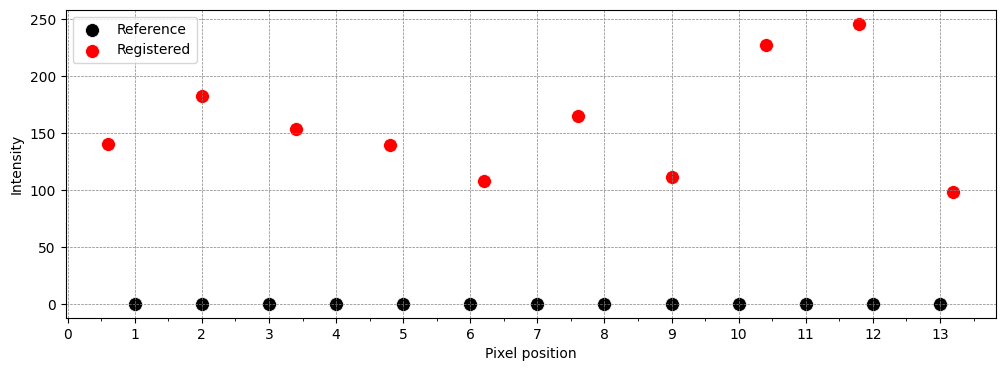

In [97]:
np.random.seed(0)
x1 = range(1,14)
y1 = np.zeros(13)

x2 = np.array(range(10))*1.4+0.6
y2 = np.random.rand(10)*255

plt.figure(figsize=(12,4))
plt.scatter(x1, y1, c='black', marker='o', edgecolors='w', linewidths=0.5, s=100, label='Reference')
plt.scatter(x2, y2, c='red', marker='o', edgecolors='w', linewidths=0.5, s=100, label='Registered')
plt.xlabel('Pixel position')
plt.ylabel('Intensity')
plt.legend(loc='upper left')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Spacing of 0.1 along the x-axis
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))  # Spacing of 0.1 along the y-axis

plt.show()


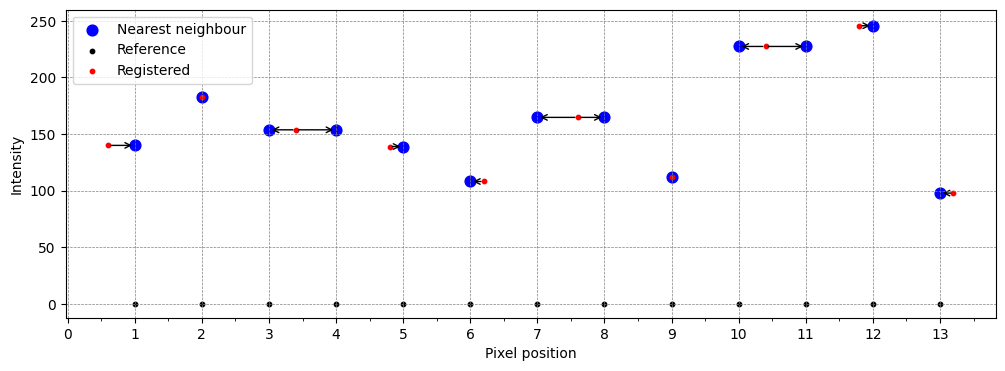

In [98]:
# Nearest neighbour
x3 = x1
y3 = np.array([
    y2[0],
    y2[1],
    y2[2],
    y2[2],
    y2[3],
    y2[4],
    y2[5],
    y2[5],
    y2[6],
    y2[7],
    y2[7],
    y2[8],
    y2[9],
])

plt.figure(figsize=(12,4))
plt.scatter(x3, y3, c='blue', marker='o', s=60, label='Nearest neighbour')
plt.scatter(x1, y1, c='black', marker='o', s=10, label='Reference')
plt.scatter(x2, y2, c='red', marker='o', s=10, label='Registered')

arrows = [
    FancyArrowPatch((x2[0], y2[0]), (x3[0], y3[0]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[2], y2[2]), (x3[2], y3[2]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[2], y2[2]), (x3[3], y3[3]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[3], y2[3]), (x3[4], y3[4]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[4], y2[4]), (x3[5], y3[5]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[5], y2[5]), (x3[6], y3[6]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[5], y2[5]), (x3[7], y3[7]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[7], y2[7]), (x3[9], y3[9]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[7], y2[7]), (x3[10], y3[10]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[8], y2[8]), (x3[11], y3[11]), arrowstyle='->', mutation_scale=10),
    FancyArrowPatch((x2[9], y2[9]), (x3[12], y3[12]), arrowstyle='->', mutation_scale=10),
]
for arrow in arrows:
    plt.gca().add_patch(arrow)

plt.xlabel('Pixel position')
plt.ylabel('Intensity')
plt.legend(loc='upper left')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Spacing of 0.1 along the x-axis
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))  # Spacing of 0.1 along the y-axis

plt.show()

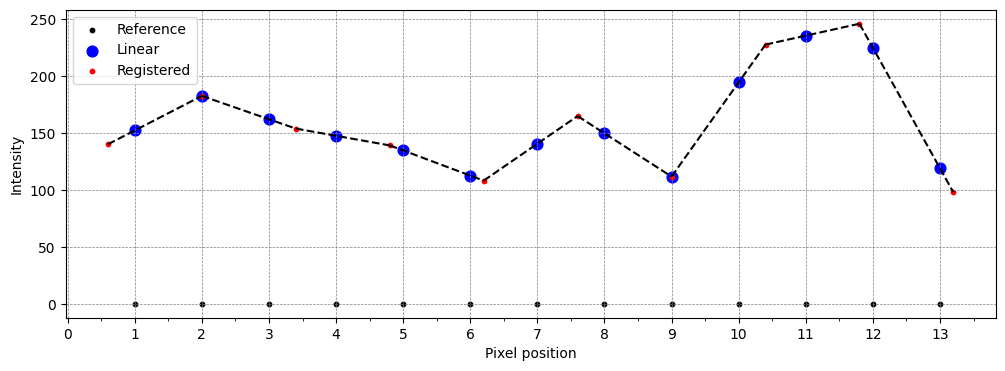

In [100]:
# Linear
plt.figure(figsize=(12,4))
plt.scatter(x1, y1, c='black', marker='o', s=10, label='Reference')
lineary = []
for i in range(9):
    plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='black', linestyle='dashed')
    a, b = np.polyfit([x2[i], x2[i+1]], [y2[i], y2[i+1]], 1)
    for j in range(1,14):
        if j>=x2[i] and j<x2[i+1]:
            lineary.append(a*j+b)
            

plt.scatter(x1, lineary, c='blue', marker='o', s=60, label='Linear')
plt.scatter(x2, y2, c='red', marker='o', s=10, label='Registered')
plt.xlabel('Pixel position')
plt.ylabel('Intensity')
plt.legend(loc='upper left')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Spacing of 0.1 along the x-axis
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))  # Spacing of 0.1 along the y-axis

plt.show()

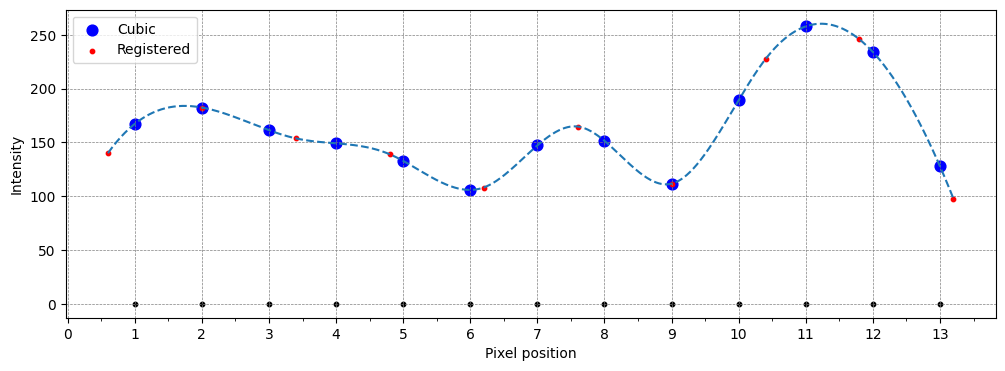

In [106]:
# Cubic
from scipy.interpolate import CubicSpline
cs = CubicSpline(x2, y2)
x_spline = np.linspace(min(x2), max(x2), 1000)
y_spline = cs(x_spline)
x_int = np.arange(1,14)
y_int = cs(x_int)
plt.figure(figsize=(12,4))

plt.plot(x_spline, y_spline, '--')


plt.scatter(x1, y1, c='black', marker='o', s=10)

plt.scatter(x_int, y_int, c='blue', marker='o', s=60, label='Cubic')
plt.scatter(x2, y2, c='red', marker='o', s=10, label='Registered')
plt.xlabel('Pixel position')
plt.ylabel('Intensity')
plt.legend(loc='upper left')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Spacing of 0.1 along the x-axis
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))  # Spacing of 0.1 along the y-axis

plt.show()